# HW 1
## Tim Demetriades
### AAI 695 WS2 - Shucheng Yu
2/2/2022

#### Question 2

#### In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.  

#### 1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
noise_scale = 100
num_of_samples = 50

x = 25 * (np.random.rand(num_of_samples, 1) - 0.8)    # 50 x 1 vector
x.sort(axis = 0)    # needed for graphs
y = 7 * x + 15 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(num_of_samples, 1)    # y = 7x + 15x^2 + x^3 + noise

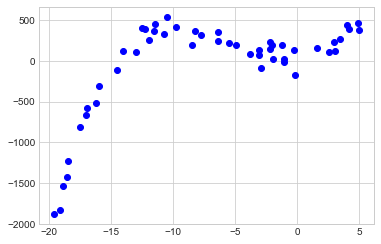

In [4]:
plt.plot(x, y, 'bo')

In [5]:
x_seq = np.linspace(x.min(), x.max(), 50).reshape(-1,1)    # needed to plot polynomial
                                                           # returns evenly spaces numbers between the specified interval

In [6]:
m = 4    # degree of polynomial

In [7]:
def fit_polynomial(x, y, m):
    poly_coef = np.polyfit(x.flatten(), y.flatten(), m).reshape(m + 1, 1)
    poly_base = np.array([x ** i for i in range(m, -1, -1)])[:, :, 0]

    poly_eqn = np.sum(poly_base * poly_coef, axis=0)
    poly_eqn = np.expand_dims(poly_eqn, axis=1)
    return poly_eqn

In [8]:
poly = fit_polynomial(x, y, m)

Text(0.5, 1.0, 'Polynomial Regression (4 degrees)')

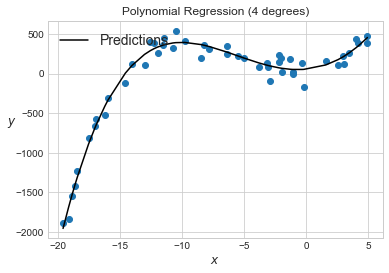

In [9]:
plt.scatter(x, y)    # plot data
plt.plot(x, poly, color = 'black', label = 'Predictions')    # plot polynomial
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=14)
plt.title('Polynomial Regression (4 degrees)')

Above you can see the plot of the original data and the line found for the predictions using polynomial regression of 4 degrees.

#### 2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m. 

In [10]:
mse_list = []
m_values = [1, 2, 3, 4, 5, 6, 7, 8]
for m in m_values:
    poly = fit_polynomial(x, y, m)
    poly_mse = mean_squared_error(y, poly)
    mse_list.append(poly_mse)

In [11]:
mse_list

[209734.9467307337,
 104113.11030618448,
 8739.246090098906,
 7930.921467504931,
 7928.076874190843,
 7927.867120185488,
 7922.738819806264,
 7724.524595183986]

Text(0, 0.5, 'MSE')

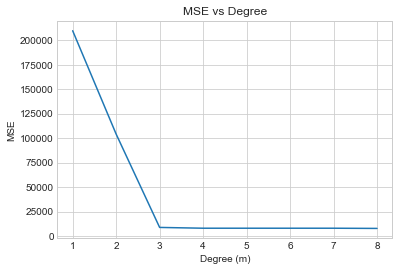

In [12]:
plt.plot(m_values, mse_list)
plt.title('MSE vs Degree')
plt.xlabel('Degree (m)')
plt.ylabel('MSE')

As can be seen in the plot above, for the polynomial degrees from 1 to 8, the mse initially sharply decreases from 1 to 3, and then gradually decreases thereafter. This makes sense since as the degree of the polynomial goes up, the better it fits the data. However, given the data, a **3 degree polynomial** will do an excellent job at fitting the data. An **8 degree polynomial** will still do the best job fitting this data as it has the lowest mse, but only by a small margin. Since the 8 degree polynomial is only slightly better than the 3 degree polynomial and has a higher chance of overfitting, the 3 degree polynomial is likely the best option.

#### 3. Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and  plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of  the returned parameters. [You need to plot a figure like in 1) for each choice of noise_scale.]

In [13]:
def generate_sample_data(noise_scale = 100, num_of_samples = 50):
    x = 25 * (np.random.rand(num_of_samples, 1) - 0.8)    # 50 x 1 vector
    x.sort(axis = 0)    # needed for graphs
    y = 7 * x + 15 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(num_of_samples, 1)    # y = 7x + 15x^2 + x^3 + noise
    return x, y

In [14]:
def gen_data_and_poly(noise_scale, num_of_samples, m):
    x, y = generate_sample_data(noise_scale, num_of_samples)
    poly = fit_polynomial(x, y, m)
    return x, y, poly

In [15]:
m = 3
x_list = []
y_list = []
poly_list = []
mse_list = []
noise_values = [150, 200, 400, 600, 1000]
for noise in noise_values:
    x, y, poly = gen_data_and_poly(noise, 50, m)
    x_list.append(x)
    y_list.append(y)
    poly_list.append(poly)
    poly_mse = mean_squared_error(y, poly)
    mse_list.append(poly_mse)

Text(-10, -1500, 'MSE: 1178077')

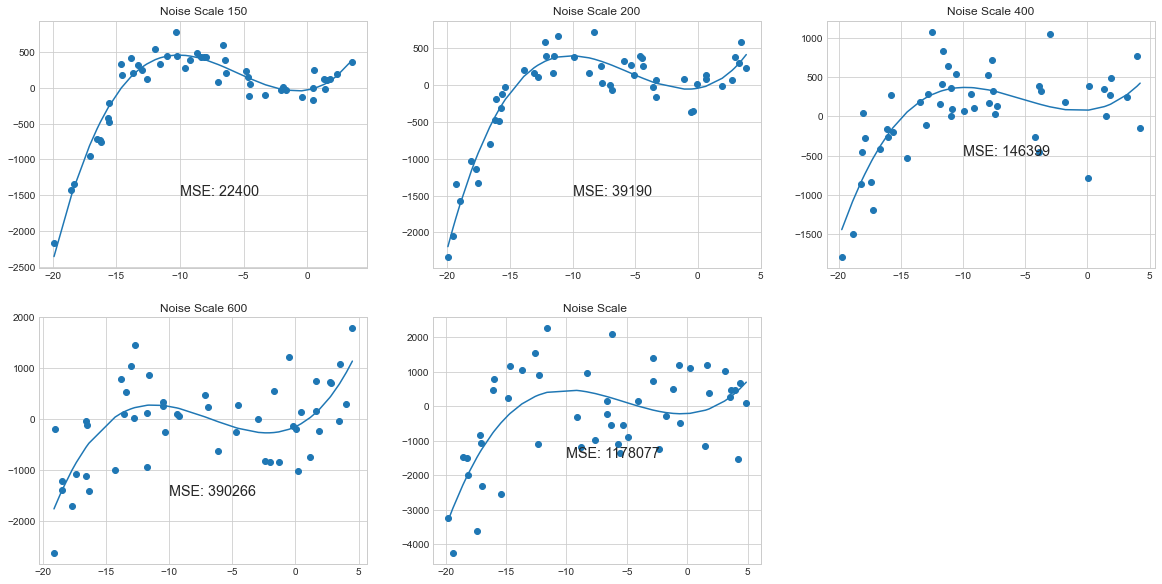

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(x_list[0], y_list[0])
plt.plot(x_list[0], poly_list[0])
plt.title('Noise Scale 150')
plt.text(-10, -1500, f'MSE: {int(mse_list[0])}', fontsize = 'x-large')

plt.subplot(2, 3, 2)
plt.scatter(x_list[1], y_list[1])
plt.plot(x_list[1], poly_list[1])
plt.title('Noise Scale 200')
plt.text(-10, -1500, f'MSE: {int(mse_list[1])}', fontsize = 'x-large')

plt.subplot(2, 3, 3)
plt.scatter(x_list[2], y_list[2])
plt.plot(x_list[2], poly_list[2])
plt.title('Noise Scale 400')
plt.text(-10, -500, f'MSE: {int(mse_list[2])}', fontsize = 'x-large')

plt.subplot(2, 3, 4)
plt.scatter(x_list[3], y_list[3])
plt.plot(x_list[3], poly_list[3])
plt.title('Noise Scale 600')
plt.text(-10, -1500, f'MSE: {int(mse_list[3])}', fontsize = 'x-large')

plt.subplot(2, 3, 5)
plt.scatter(x_list[4], y_list[4])
plt.plot(x_list[4], poly_list[4])
plt.title('Noise Scale ')
plt.text(-10, -1500, f'MSE: {int(mse_list[4])}', fontsize = 'x-large')

Text(0, 0.5, 'MSE')

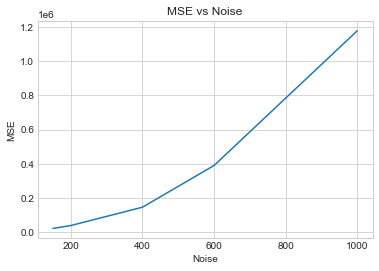

In [17]:
plt.plot(noise_values, mse_list)
plt.title('MSE vs Noise')
plt.xlabel('Noise')
plt.ylabel('MSE')

As can be seen above, **increasing the noise increases the spread of the data**. As a result, the polynomial has a harder time fitting the data, resulting in the **MSE values increasing for the higher noise values**. The higher noise polynomials also seem to be **underfitting** the data more.

#### 4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot  the polynomials with the m found in 2). Discuss the impact of the number of samples to the  accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of  number_of_samples.] 

In [18]:
m = 3
x_list = []
y_list = []
poly_list = []
mse_list = []
sample_values = [40, 30, 20, 10]
for num_samples in sample_values:
    x, y, poly = gen_data_and_poly(100, num_samples, m)
    x_list.append(x)
    y_list.append(y)
    poly_list.append(poly)
    poly_mse = mean_squared_error(y, poly)
    mse_list.append(poly_mse)

Text(-10, -200, 'MSE: 3404')

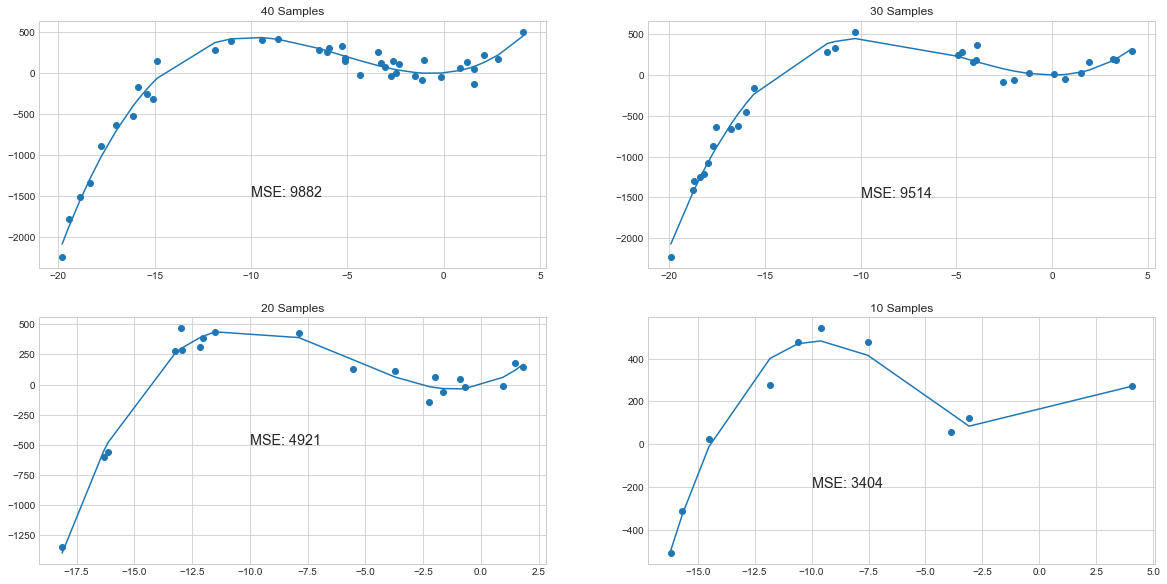

In [22]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(x_list[0], y_list[0])
plt.plot(x_list[0], poly_list[0])
plt.title('40 Samples')
plt.text(-10, -1500, f'MSE: {int(mse_list[0])}', fontsize = 'x-large')

plt.subplot(2, 2, 2)
plt.scatter(x_list[1], y_list[1])
plt.plot(x_list[1], poly_list[1])
plt.title('30 Samples')
plt.text(-10, -1500, f'MSE: {int(mse_list[1])}', fontsize = 'x-large')

plt.subplot(2, 2, 3)
plt.scatter(x_list[2], y_list[2])
plt.plot(x_list[2], poly_list[2])
plt.title('20 Samples')
plt.text(-10, -500, f'MSE: {int(mse_list[2])}', fontsize = 'x-large')

plt.subplot(2, 2, 4)
plt.scatter(x_list[3], y_list[3])
plt.plot(x_list[3], poly_list[3])
plt.title('10 Samples')
plt.text(-10, -200, f'MSE: {int(mse_list[3])}', fontsize = 'x-large')

Text(0, 0.5, 'MSE')

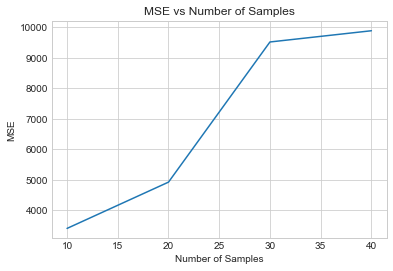

In [20]:
plt.plot(sample_values, mse_list)
plt.title('MSE vs Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('MSE')

Based on the above, it would apear that **as the number of samples decreases, the accuracy increases and the MSE decreases**. This makes sense, as there are less points the polynomial needs to fit. However, the polynomials for the lower number of samples seem to also be **overfitting** the data as a result.